<a href="https://colab.research.google.com/github/Chubbyman2/Udacity_Tensorflow_Tutorials/blob/master/Cats_and_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
# tf.keras.utils.get_file downloads the file and unpacks it on the disk
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=True)

68608000/68606236 [==============================] - 1s 0us/step


In [ ]:
# List the directories
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats


In [ ]:
base_dir = os.path.join(os.path.dirname(zip_dir), "cats_and_dogs_filtered")
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [ ]:
# How many cats and dogs images we have in our training and validation directories
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [ ]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [ ]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [ ]:
# Basically, it just rescales all pixels to be from 0-1 instead of 0-255
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for validation data

In [ ]:
# Loads images from disk, applies rescaling, resizes the images
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE, 
                                                           directory=train_dir,
                                                           shuffle=True, # Randomizes the order of the images so model does not memorize the order
                                                           target_size=(IMG_SHAPE, IMG_SHAPE), #(150, 150)
                                                           class_mode="binary") # Only 2 classes: dog or cat

val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE, 
                                                         directory=validation_dir,
                                                         shuffle=False,
                                                         target_size=(IMG_SHAPE, IMG_SHAPE), #(150, 150)
                                                         class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


**Visualizing Training Images**

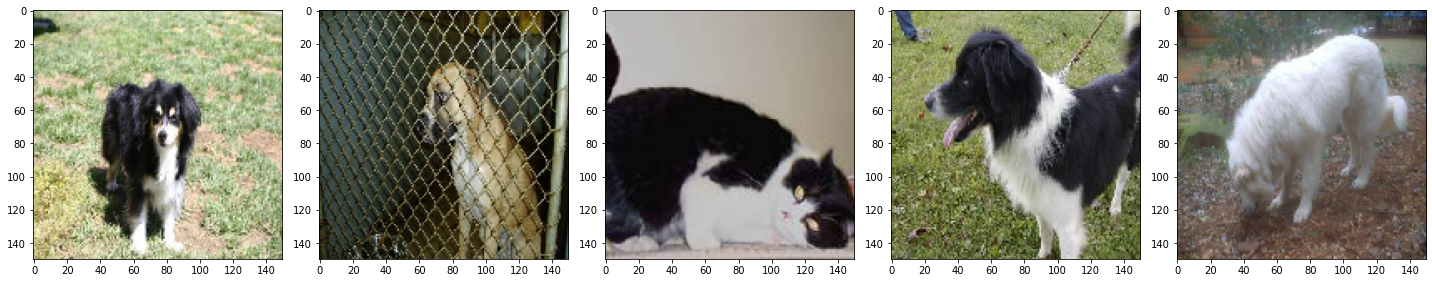

In [ ]:
sample_training_images, _ = next(train_data_gen)

# This function plots images as a grid w/ 1 row and 5 columns, each image is in a column
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip( images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

plotImages(sample_training_images[:5]) # Plots images 0-4

**Data Augmentation**

We augment the limited amount of training examples to generate more training data. 

This is done by transforming the original images, either by flipping, zooming, cropping, rotating, etc.

In [ ]:
# Augmentation via horizontal flip
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


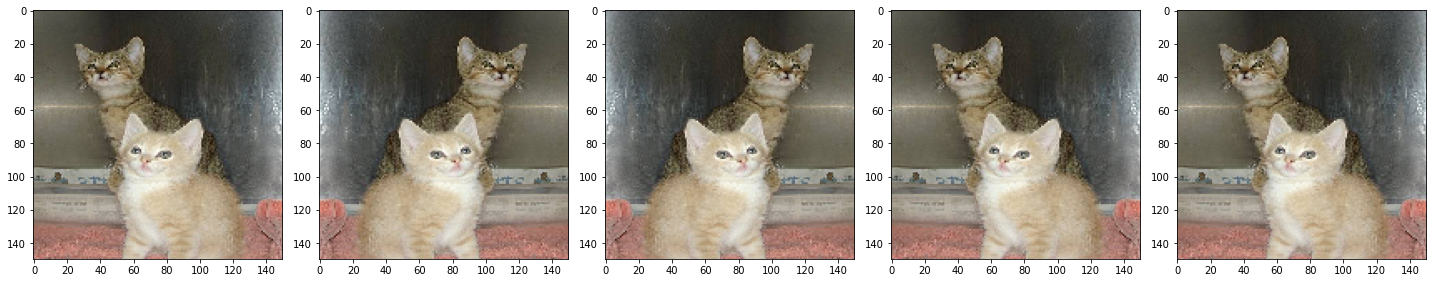

In [ ]:
# Does the transformation on a sample image 5 times (note: augmentation may or may not be applied)
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
# Augmentation via rotate
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45) # degrees

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


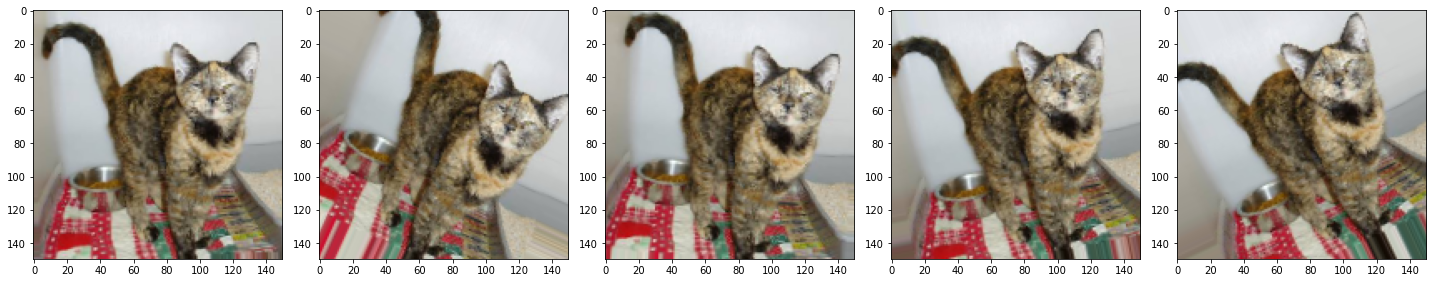

In [ ]:
# Applies transformation 5 times
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
# Augmentation via zoom
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


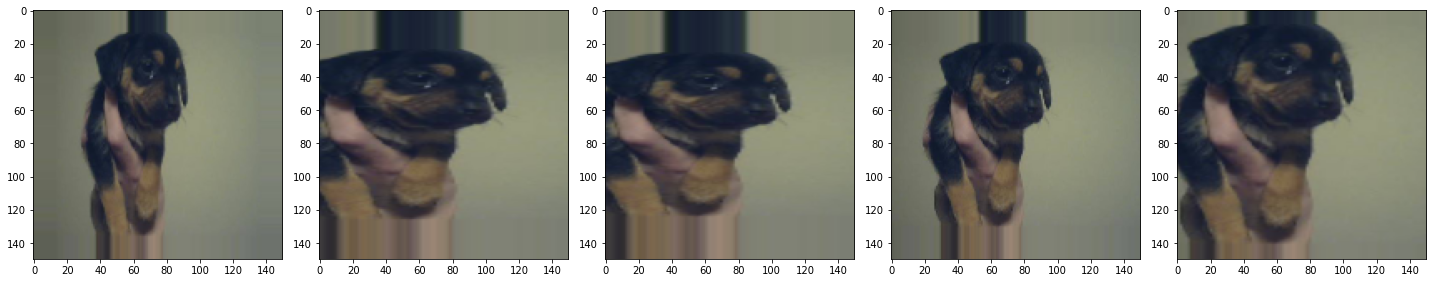

In [ ]:
# Applies transformation 5 times
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

**Putting Them All Together**

In [ ]:
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE, IMG_SHAPE),
                                                     class_mode="binary")

Found 2000 images belonging to 2 classes.


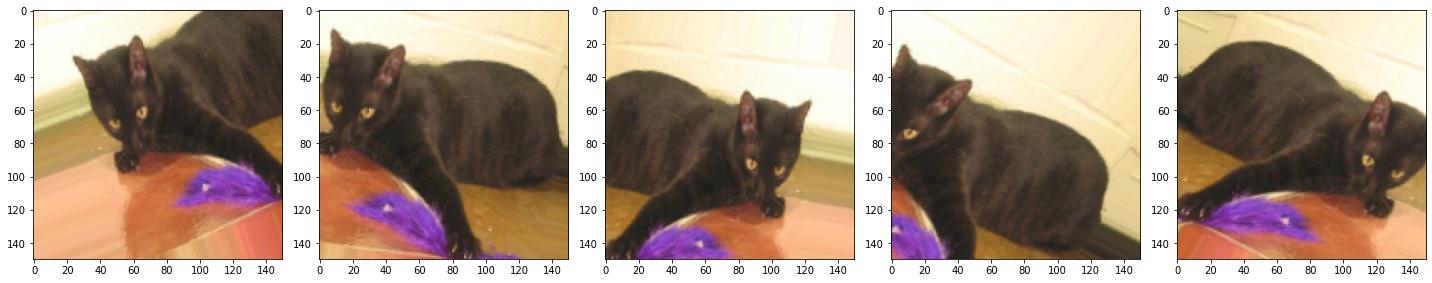

In [ ]:
# Again, applies transformations 5 times
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

**Validation Data Generator**

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode="binary")

Found 1000 images belonging to 2 classes.


**Making the Model**

In [ ]:
# Defining the Model
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(150, 150, 3)),
#     tf.keras.layers.MaxPooling2D(2,2),

#     tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
#     tf.keras.layers.MaxPooling2D(2,2,),

#     tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
#     tf.keras.layers.MaxPooling2D(2,2,),

#     tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
#     tf.keras.layers.MaxPooling2D(2,2,),

## 50% of the values coming into the dropout layer will be reset to 0
## Another method of reducing overfit
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation="relu"),
#     tf.keras.layers.Dense(2, activation="softmax")
# ])

# Using a Sigmoid Function instead
# Doesn't change results of overfitting, though
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
# Compiling the Model
# model.compile(optimizer="adam",
#               loss="sparse_categorical_crossentropy",
#               metrics=["accuracy"])

# Different compiler for sigmoid function
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
# View all layers of the network
# Notice how, due to the lack of padding, the shape reduces by 2x2 each conv2D layer
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
# Training the Model
# Use fit_generator instead of fit because batches are coming from a generator
# Notice with overfitting correction techniques, the val_accuracy rose from 74.2% to 81.1%, even though the accuracy is only 80.8% now

EPOCHS = 50 # Should be 100, but overfitting and takes too long
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/50
20/20 [==============================] - 19s 967ms/step - loss: 0.6959 - accuracy: 0.5070 - val_loss: 0.6904 - val_accuracy: 0.5090
Epoch 2/50
20/20 [==============================] - 20s 986ms/step - loss: 0.6913 - accuracy: 0.5110 - val_loss: 0.6837 - val_accuracy: 0.6300
Epoch 3/50
20/20 [==============================] - 20s 985ms/step - loss: 0.6775 - accuracy: 0.5610 - val_loss: 0.6733 - val_accuracy: 0.5450
Epoch 4/50
20/20 [==============================] - 20s 977ms/step - loss: 0.6636 - accuracy: 0.5875 - val_loss: 0.6363 - val_accuracy: 0.6250
Epoch 5/50
20/20 [==============================] - 19s 974ms/step - loss: 0.6542 - accuracy: 0.5870 - val_loss: 0.6230 - val_accuracy: 0.6430
Epoch 6/50
20/20 [==============================] - 20s 975ms/step - loss: 0.6428 - accuracy: 0.6010 - val_loss: 0.6265 - val_accuracy: 0.6280
Epoch 7/50
20/20 [==============================] - 19s 967ms/step - loss: 0.6379 - accuracy: 0.6340 - val_loss: 0.6157 - val_accuracy: 0.6490

**Visualizing results of the training**

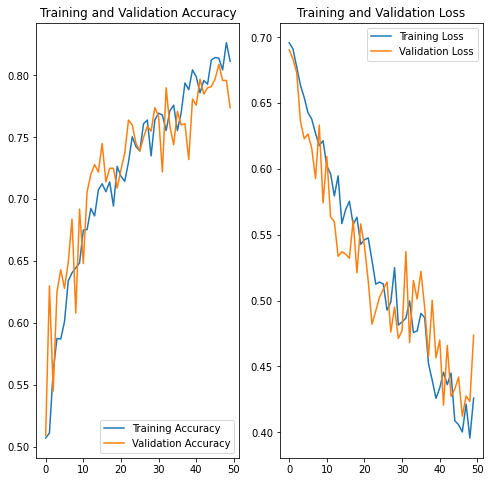

In [ ]:
# Notice how the validation loss increased as the training loss decreased
# This is the result of overfitting
acc = history.history["accuracy"] # "accuracy" not "acc"
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.savefig("./foo.png")
plt.show()